## 資料不平衡處理

### Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTENC

### Data Import

In [2]:
dict_dfs_fs = pd.read_pickle('../data/data_fs.pkl')
print(dict_dfs_fs.keys())

dict_keys(['others', 'train', 'test', 'feature_selection'])


In [3]:
X_train = dict_dfs_fs['train']['X_select']
y_train = dict_dfs_fs['train']['y']

### Data Visualize

In [4]:
# 設定字型（以顯示中文）
plt.rcParams['font.family'] = 'Noto Sans TC'    # 思源黑體

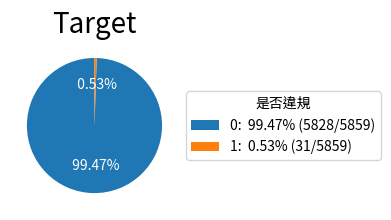

In [ ]:
# 以 pie chart 呈現目標變數占比（建立 function ???）
#   Step 1. prepare data
pieData = y_train.value_counts()
labels = pieData.index.astype('str').tolist()
sizes = pieData.values
total = sizes.sum()

#   Step 2. plot pie chart
fig, ax = plt.subplots(figsize=(4, 4))

wedges, texts, autotexts= ax.pie(
    x=sizes, 
    autopct=lambda pct: f'{pct: .2f}%',    # use f-string by lambda function
    textprops=dict(color='w'), 
    startangle=90
)
# wedges: 扇形物件，調整扇形參數
# texts: 設定 labels 產生的文字物件
# autotexts: 設定 autopct 產生的文字物件

#   Step 3. add legend
legend_labels = [
    f'{l}: {t.get_text()} ({s}/{total})' 
    for l, s, t in zip(labels, sizes, autotexts)
]

ax.legend(
    handles=wedges,    # list of Artist
    labels=legend_labels,    # list of str
    title = '是否違規', 
    loc = 'center left',    # 對齊定位點位置（eg.中間左側）
    bbox_to_anchor = (1.0, 0.5)    # 定位點(x, y)
)
# 改用其他方式呈現文字？？？

#   Step 4. title & layout
ax.set_title('Target', fontsize=20)
fig.tight_layout()
plt.show()

### Handling Imbalanced Datasets
以 SMOTENC 進行資...

* 合成樣本前若先將類別特徵做Dummy Encoding，可能出現多個子特徵同時為1之情況。

In [18]:
# 先將數值資料轉為 float ，合成樣本後再四捨五入，避免向零截斷（truncation toward zero）
cols_num = X_train.select_dtypes(include='uint32').columns.tolist()
X_sm0 = pd.concat([X_train[cols_num].astype('float32'), X_train.drop(cols_num, axis=1)], axis=1)

In [ ]:
# 類別特徵名稱
cols_cat = X_sm0.drop(cols_num, axis=1).columns.tolist()

# 建立 SMOTENC 物件
sm = SMOTENC(
    categorical_features=cols_cat,    # specify categorical features
    sampling_strategy=3/7,    # ratio of minor/major
    random_state=12
)

# 合成樣本（加在原始資料後）
X_sm, y_sm = sm.fit_resample(X=X_sm0, y=y_train)
X_sm = X_sm.round(0)    # 四捨五入數值資料

,資本額,營業縣市,場所型式,餐飲業次業別數,標章分數,場所規模,是否兼具製造業,是否兼具販售業,上市上櫃,導入HACCP,...,逾期食品法規認知,有直營連鎖店,有加盟連鎖店,同一地址有多個餐飲場所,有餐飲場所且有工廠製造場所,有餐飲場所且委託他廠代工,美食平台,有無專技人員,有無技術士證照,有無供應學校
0,1200000.0,南投縣,a,1,0,4,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1000000.0,台南市,a,2,0,4,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,312000000.0,彰化縣,a,1,0,2,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0.0,新北市,d,1,0,4,0,0,0,1,...,1,0,0,1,1,0,1,1,1,0
4,10000000.0,花蓮縣,c,1,0,5,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8320,722206528.0,桃園市,a,1,0,5,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8321,2784340.0,桃園市,a,1,0,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8322,901068.0,宜蘭縣,a,1,0,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8323,200000.0,台南市,a,1,0,5,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [33]:
del cols_num, cols_cat, X_sm0, sm